In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df=pd.read_csv('abalone.csv')

In [4]:
df

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       4177 non-null   int64  
 1   Length    4177 non-null   float64
 2   Diameter  4177 non-null   float64
 3   Height    4177 non-null   float64
 4   Whole     4177 non-null   float64
 5   Shucked   4177 non-null   float64
 6   Viscera   4177 non-null   float64
 7   Shell     4177 non-null   float64
 8   Rings     4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [7]:
df.shape

(4177, 9)

In [8]:

df.describe()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.991621,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
#checking null values
df.isnull().sum()


Sex         0
Length      0
Diameter    0
Height      0
Whole       0
Shucked     0
Viscera     0
Shell       0
Rings       0
dtype: int64

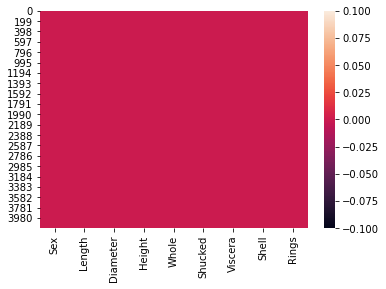

In [10]:

sns.heatmap(df.isnull())


In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Sex', 'Rings'], dtype='object'),
 dtype('float64'): Index(['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell'], dtype='object')}

In [12]:
df.skew()

Sex         0.014980
Length     -0.639873
Diameter   -0.609198
Height      3.128817
Whole       0.530959
Shucked     0.719098
Viscera     0.591852
Shell       0.620927
Rings       1.114102
dtype: float64

In [13]:
###'''Target Column Analysis'''
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


In [14]:
print(len(df.Rings.unique()))

28


In [15]:
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [18]:
df

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [19]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[0.0105225 , 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.57154357],
       [0.0105225 , 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        0.91001299],
       [1.26630752, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.28962385],
       ...,
       [0.0105225 , 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.28962385],
       [1.26630752, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.02057072],
       [0.0105225 , 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        0.64095986]])

In [20]:
threshold=3
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1

In [21]:
z[6][8]


3.12251641377204

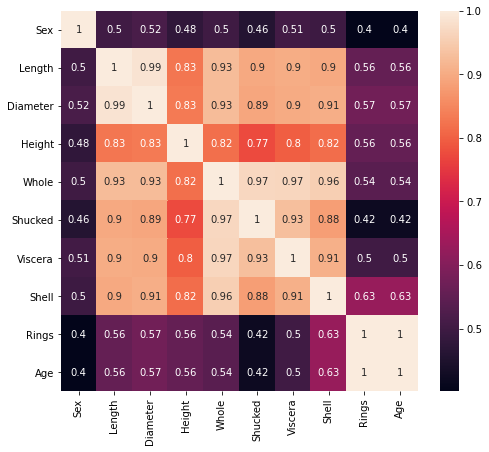

In [22]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [23]:
df_new=df[(z<3).all(axis=1)]

In [24]:

df_new

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [25]:
df_new.shape

(4027, 10)

In [26]:
#Training

#Dividing X and y
y=df[['Rings']]
x=df.drop(['Rings'], axis = 1)

In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [29]:
x_train.shape

(2798, 9)

In [30]:
y_train.shape

(2798, 1)

In [31]:
x_test.shape

(1379, 9)

In [32]:
y_test.shape

(1379, 1)

In [33]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
lm.coef_

array([[ 3.86185227e-15, -3.66373598e-15,  5.10702591e-15,
         6.93889390e-16, -1.41553436e-15,  2.13717932e-15,
        -1.05471187e-15, -8.60422844e-16,  3.22378307e+00]])

In [35]:
lm.intercept_

array([9.93368446])

In [36]:
lm.score(x_train,y_train)

1.0

In [37]:
from sklearn.linear_model import Lasso,Ridge

In [38]:

ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9059065577949271

In [39]:
ls.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 2.23489875])

In [40]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9999997316755563

In [41]:

rd.coef_

array([[ 2.00049071e-04,  5.10061120e-05,  7.82026642e-04,
         3.29450787e-04,  3.53201603e-03, -3.50022382e-03,
        -8.59584211e-04,  9.21883547e-04,  3.22132526e+00]])

In [42]:

from sklearn.linear_model import ElasticNet
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.8240941228335679


array([0.        , 0.01645426, 0.06139735, 0.06885176, 0.        ,
       0.        , 0.        , 0.23736224, 1.67180362])

In [43]:

print('error :')
print(mean_squared_error(y_test,pred))

error :


NameError: name 'pred' is not defined

In [44]:

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

NameError: name 'pred' is not defined

In [45]:
print('error :')
print(mean_squared_error(y_test,predict))

error :


NameError: name 'predict' is not defined

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
rfr.score(x_train,y_train)

0.9999434160345099

In [48]:
rfr=RandomForestRegressor(n_estimators=300,random_state=46)

In [49]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=46)

In [50]:
rfr.score(x_train,y_train)

0.9999396885080188